In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('../jupyter/data/dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
my_classes = ['bird', 'cat','dog','housefly','sheep']

../jupyter/data/dataset/bird\bird-01.wav
../jupyter/data/dataset/bird\bird-02.wav
../jupyter/data/dataset/bird\bird-03.wav
../jupyter/data/dataset/bird\bird-04.wav
../jupyter/data/dataset/bird\bird-05.wav
../jupyter/data/dataset/bird\bird-06.wav
../jupyter/data/dataset/bird\bird-07.wav
../jupyter/data/dataset/bird\bird-08.wav
../jupyter/data/dataset/bird\bird-09.wav
../jupyter/data/dataset/bird\bird-10.wav
../jupyter/data/dataset/bird\bird-100.wav
../jupyter/data/dataset/bird\bird-101.wav
../jupyter/data/dataset/bird\bird-102.wav
../jupyter/data/dataset/bird\bird-103.wav
../jupyter/data/dataset/bird\bird-104.wav
../jupyter/data/dataset/bird\bird-105.wav
../jupyter/data/dataset/bird\bird-106.wav
../jupyter/data/dataset/bird\bird-107.wav
../jupyter/data/dataset/bird\bird-108.wav
../jupyter/data/dataset/bird\bird-109.wav
../jupyter/data/dataset/bird\bird-11.wav
../jupyter/data/dataset/bird\bird-110.wav
../jupyter/data/dataset/bird\bird-12.wav
../jupyter/data/dataset/bird\bird-13.wav
../ju

In [2]:
import os
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_io as tfio
import seaborn as sns
from sklearn.utils import shuffle
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split


In [3]:
yamnet_model_handle = 'https://hub.tensorflow.google.cn/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

In [4]:
@tf.function
def load_wav_16k_mono(filename):
    """ read in a waveform file and convert to 16 kHz mono """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [5]:
class_map_path = yamnet_model.class_map_path().numpy().decode('utf-8')
class_names =list(pd.read_csv(class_map_path)['display_name'])

for name in class_names[:20]:
  print(name)
print('...')

Speech
Child speech, kid speaking
Conversation
Narration, monologue
Babbling
Speech synthesizer
Shout
Bellow
Whoop
Yell
Children shouting
Screaming
Whispering
Laughter
Baby laughter
Giggle
Snicker
Belly laugh
Chuckle, chortle
Crying, sobbing
...


In [6]:
import pathlib
data_dir = pathlib.Path('../jupyter/data/dataset')
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[commands != 'README.md']
print('Commands:', commands)

Commands: ['bird' 'cat' 'dog' 'housefly' 'sheep']


In [7]:
train_bird_files = '../jupyter/data/dataset/bird/' +\
pd.DataFrame(os.listdir("../jupyter/data/dataset/bird/"),columns=["file_name"])
train_bird_labels = pd.DataFrame(np.asarray(np.ones(len(train_bird_files))).astype(np.int32),columns=["label"])

train_cat_files = '../jupyter/data/dataset/cat/' +\
pd.DataFrame(os.listdir("../jupyter/data/dataset/cat/"),columns=["file_name"])
train_cat_labels = pd.DataFrame(np.asarray(np.zeros(len(train_cat_files))).astype(np.int32),columns=["label"]) 

train_dog_files = '../jupyter/data/dataset/dog/' +\
pd.DataFrame(os.listdir("../jupyter/data/dataset/dog/"),columns=["file_name"])
list_train_dog= []
for i in range (len(train_dog_files)):
    list_train_dog.append(2)
train_dog_labels = pd.DataFrame(list_train_dog,columns=["label"],dtype=np.int32 )

train_housefly_files = '../jupyter/data/dataset/housefly/' +\
pd.DataFrame(os.listdir("../jupyter/data/dataset/housefly/"),columns=["file_name"])
list_train_housefly= []
for i in range (len(train_housefly_files)):
    list_train_housefly.append(3)
train_housefly_labels = pd.DataFrame(list_train_housefly,columns=["label"],dtype=np.int32 )

train_sheep_files = '../jupyter/data/dataset/sheep/' +\
pd.DataFrame(os.listdir("../jupyter/data/dataset/sheep/"),columns=["file_name"])
list_train_sheep= []
for i in range (len(train_sheep_files)):
    list_train_sheep.append(4)
train_sheep_labels = pd.DataFrame(list_train_sheep,columns=["label"],dtype=np.int32 )

data=pd.concat([train_bird_files,train_cat_files,train_dog_files,train_housefly_files,train_sheep_files]
               ,ignore_index=True).squeeze()
labels=pd.concat([train_bird_labels,train_cat_labels,train_dog_labels,train_housefly_labels,train_sheep_labels]
                 ,ignore_index=True).squeeze()


complete=pd.concat([data,labels], axis=1)

In [8]:


a =complete.label.value_counts()
print(a)

4    110
3    110
2    110
1    110
0    110
Name: label, dtype: int64


In [9]:
X=complete["file_name"].values
y=complete["label"].values

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.15, random_state=2, stratify=y)
trainX, valX, trainy, valy = train_test_split(trainX, trainy, test_size=0.21, random_state=2, stratify=trainy)
    
train_0, train_1,train_2 = len(trainy[trainy==0]), len(trainy[trainy==1]), len(trainy[trainy==2])
train_3, train_4 = len(trainy[trainy==3]), len(trainy[trainy==4])

test_0, test_1,test_2 = len(testy[testy==0]), len(testy[testy==1]), len(testy[testy==2])
test_3, test_4 = len(testy[testy==3]), len(testy[testy==4])
                                                                        
val_0, val_1, val_2 = len(valy[valy==0]), len(valy[valy==1]), len(valy[valy==2])
val_3, val_4 = len(valy[valy==3]), len(valy[valy==4])  

                                                                        
print('>Train: 0=%d, 1=%d, 2=%d, 3=%d, 4=%d' % (train_0, train_1, train_2, train_3, train_4))
print('>Test: 0=%d, 1=%d, 2=%d, 3=%d, 4=%d' % (test_0, test_1, test_2, test_3, test_4))
print('>Val: 0=%d, 1=%d, 2=%d, 3=%d, 4=%d' % (val_0, val_1, val_2, val_3, val_4))
                                                                        
                                                                        
folds=[]
for file in X:
    if file in testX:
        folds.append("testX")
    elif file in valX:
        folds.append("valX")
    else: folds.append("trainX")
        
        
fold_names = pd.DataFrame(folds,columns=["fold"]).squeeze()
complete=pd.concat([complete,fold_names], axis=1)
complete = shuffle(complete)
complete.head()

>Train: 0=73, 1=73, 2=74, 3=74, 4=74
>Test: 0=17, 1=17, 2=16, 3=17, 4=16
>Val: 0=20, 1=20, 2=20, 3=19, 4=20


,file_name,label,fold
318,../jupyter/data/dataset/dog/dog-88.wav,2,valX
205,../jupyter/data/dataset/cat/cat-85.wav,0,testX
443,../jupyter/data/dataset/sheep/sheep-04.wav,4,valX
25,../jupyter/data/dataset/bird/bird-15.wav,1,trainX
473,../jupyter/data/dataset/sheep/sheep-23.wav,4,trainX


In [10]:
main_ds = tf.data.Dataset.from_tensor_slices((data, labels,folds))
main_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [11]:
def load_wav_for_map(filename, label, fold):
  return load_wav_16k_mono(filename), label, fold

In [12]:
main_ds = main_ds.map(load_wav_for_map)
main_ds.element_spec

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [13]:
# applies the embedding extraction model to a wav data
def extract_embedding(wav_data, label, fold):
  
  scores, embeddings, spectrogram = yamnet_model(wav_data)
  num_embeddings = tf.shape(embeddings)[0]
  return (embeddings,
            tf.repeat(label, num_embeddings),
            tf.repeat(fold, num_embeddings))

# extract embedding
main_ds = main_ds.map(extract_embedding).unbatch()
main_ds.element_spec

(TensorSpec(shape=(1024,), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [14]:
cached_ds = main_ds.cache()
train_ds = cached_ds.filter(lambda embedding, label, fold: fold == "trainX")
val_ds = cached_ds.filter(lambda embedding, label, fold: fold == "valX")
test_ds = cached_ds.filter(lambda embedding, label, fold: fold == "testX")

# remove the folds column now that it's not needed anymore
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

In [15]:
my_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024), dtype=tf.float32,
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(my_classes))
], name='my_model')

my_model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 645       
Total params: 706,181
Trainable params: 706,181
Non-trainable params: 0
_________________________________________________________________


In [16]:
my_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=12,
                                            restore_best_weights=True)

In [17]:
history = my_model.fit(train_ds,
                       epochs=50,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/50
16/16 [==============================] - 6s 20ms/step - loss: 0.5076 - accuracy: 0.8668 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 2/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0347 - accuracy: 0.9881 - val_loss: 0.0257 - val_accuracy: 0.9926
Epoch 3/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0291 - accuracy: 0.9901 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0111 - accuracy: 0.9960 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 5/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0137 - accuracy: 0.9920 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 6/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0141 - accuracy: 0.9980 - val_loss: 0.0079 - val_accuracy: 0.9926
Epoch 7/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 8/50
16

In [18]:
loss, accuracy = my_model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

4/4 [==============================] - 0s 10ms/step - loss: 0.1551 - accuracy: 0.9823
Loss:  0.15509316325187683
Accuracy:  0.982300877571106


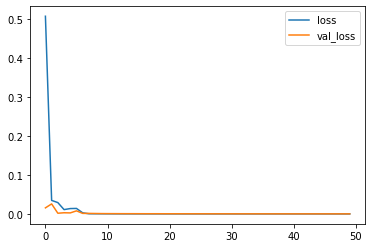

In [19]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [20]:
class ReduceMeanLayer(tf.keras.layers.Layer):
  def __init__(self, axis=0, **kwargs):
    super(ReduceMeanLayer, self).__init__(**kwargs)
    self.axis = axis

  def call(self, input):
    return tf.math.reduce_mean(input, axis=self.axis)


saved_model_path = './csv_format'

input_segment = tf.keras.layers.Input(shape=(), dtype=tf.float32, name='audio')
embedding_extraction_layer = hub.KerasLayer(yamnet_model_handle,
                                            trainable=False, name='yamnet')
_, embeddings_output, _ = embedding_extraction_layer(input_segment)
serving_outputs = my_model(embeddings_output)
serving_outputs = ReduceMeanLayer(axis=0, name='classifier')(serving_outputs)
serving_model = tf.keras.Model(input_segment, serving_outputs)
serving_model.save(saved_model_path, include_optimizer=False)


#Load the saved model to verify that it works as expected.
reloaded_model = tf.saved_model.load(saved_model_path)

INFO:tensorflow:Assets written to: ./csv_format\assets


INFO:tensorflow:Assets written to: ./csv_format\assets


../jupyter/data/dataset/bird/bird-08.wav


Waveform values: [-5.4382266e-08  1.3266603e-07 -1.5348664e-07 ... -2.2129210e-02
 -1.9618146e-02  1.1802658e-02]


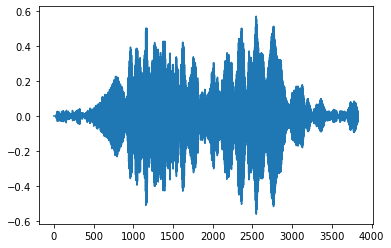

In [21]:
test_pd = complete.loc[complete['fold'] == "testX"] 
row = test_pd.sample(1)
filename = row['file_name'].item()
filename2 ='../jupyter/data/dataset/dog/dog-46.wav'
print(filename)
waveform = load_wav_16k_mono(filename)
print(f'Waveform values: {waveform}')
_ = plt.plot(waveform)

display.Audio(waveform, rate=16000)

In [ ]:
# Run the model, check the output.
scores, embeddings, spectrogram = yamnet_model(waveform)
class_scores = tf.reduce_mean(scores, axis=0)
top_class = tf.argmax(class_scores)
infered_class = class_names[top_class]
top_score = class_scores[top_class]
print(f'[YAMNet] The main sound is: {infered_class} ({top_score})')

reloaded_results = reloaded_model(waveform)
your_top_class = tf.argmax(reloaded_results)
your_infered_class = my_classes[your_top_class]
class_probabilities = tf.nn.softmax(reloaded_results, axis=-1)
your_top_score = class_probabilities[your_top_class]
print(f'[Your model] The main sound is: {your_infered_class} ({your_top_score})')

In [ ]:
test_audio = []
test_labels = []

for _, row in test_pd.iterrows():
    test_audio.append(load_wav_16k_mono(row["file_name"]))
    test_labels.append(row['label'])
    

y_pred=[]
for test_sound in test_audio:
    y_pred.append(reloaded_model(test_sound))
y_pred = np.argmax(y_pred, axis=1)


y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

In [22]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=my_classes, yticklabels=my_classes, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

NameError: name 'y_true' is not defined